In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.graficar import graficar_serie 
from src.ARIMA_experimento import ARIMA_experimento
from src.evaluar import evaluar_forecast

###  Descomposición de la serie ###
from statsmodels.tsa.seasonal import seasonal_decompose

## Reporte 3
* Ventana de 1665 horas
* Horizonte de 24 horas

In [71]:
ruta_df = 'data/raw_data/Vehicle.csv'
df = pd.read_csv(ruta_df)  
print(df.shape)
df.head()

(1689, 2)


,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193


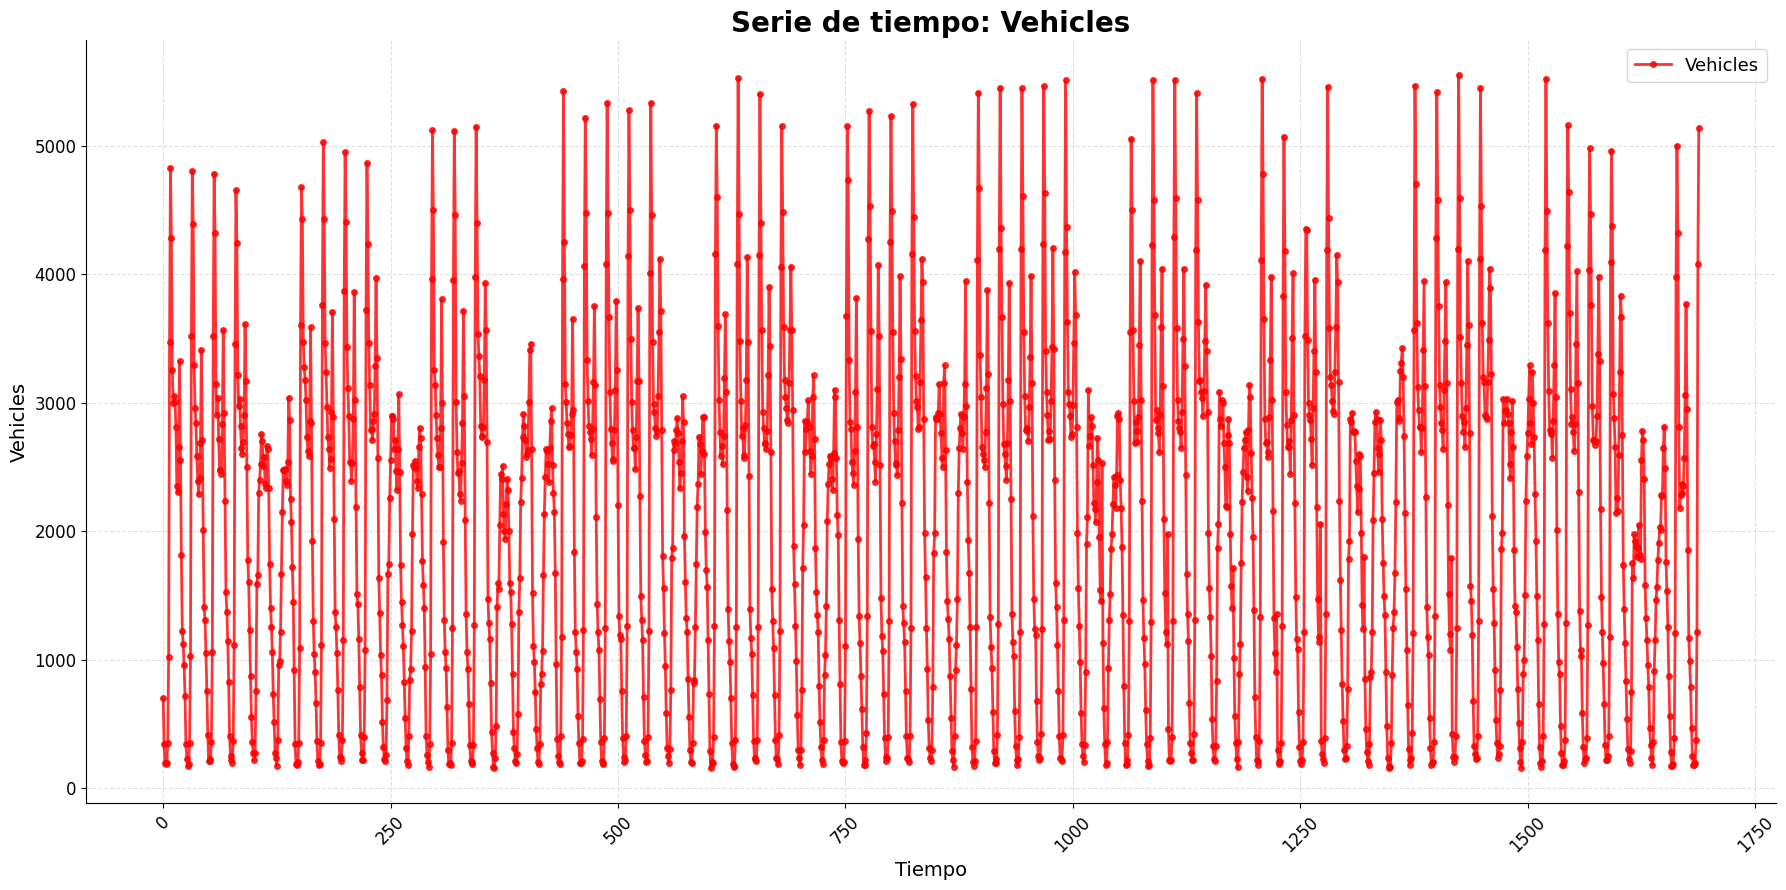

In [72]:
serie = pd.Series(df['Vehicles'].values)
graficar_serie(df, 'Vehicles', color = 'red')

### Descomponer la Serie

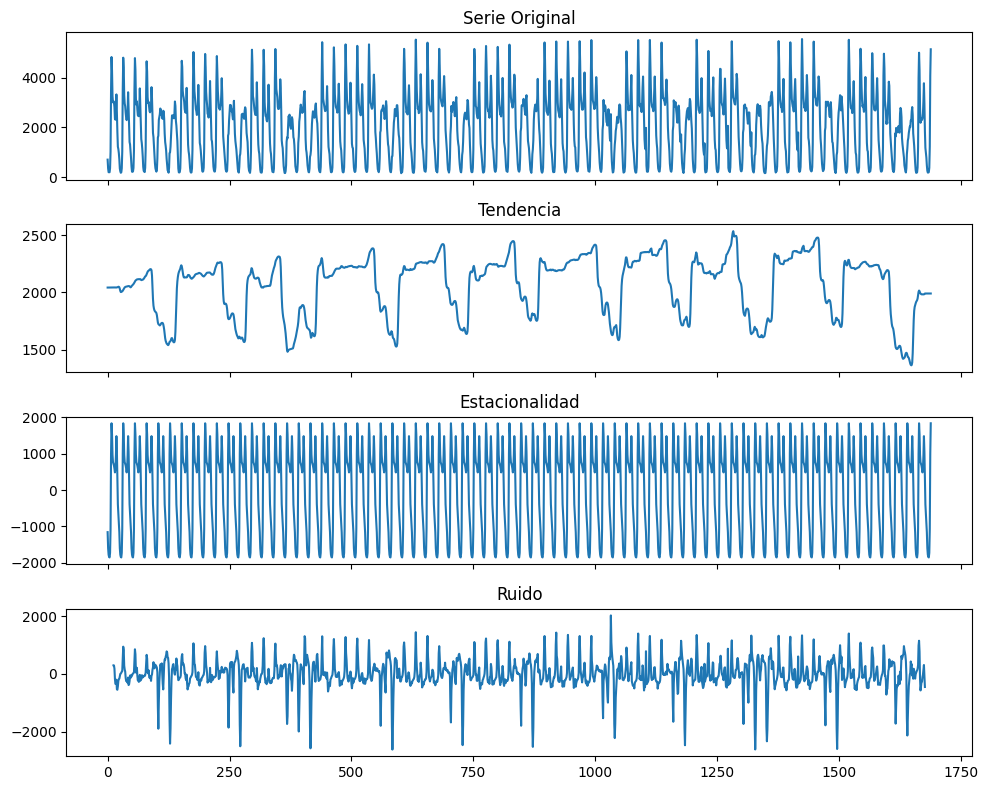

In [81]:
desc = seasonal_decompose(df['Vehicles'], model = 'additive', period = 24)

# Definir descomposicion
tendencia = desc.trend
tendencia = tendencia.interpolate(method = 'linear', limit_direction = 'both')
estacionalidad = desc.seasonal
ruido = desc.resid

# Graficar la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

df['Vehicles'].plot(ax=ax1, title='Serie Original')
tendencia.plot(ax=ax2, title='Tendencia')
estacionalidad.plot(ax=ax3, title='Estacionalidad')
ruido.plot(ax=ax4, title='Ruido')

plt.tight_layout()
plt.show()
plt.close()

### Repartir la desocmposición para Ventana y Ruido

In [74]:
print(f'shape serie          : {serie.shape}')
print(f'shape tendencia      : {tendencia.shape}')
print(f'shape estacionalidad : {estacionalidad.shape}')
print(f'shape ruido          : {ruido.shape}')

shape serie          : (1689,)
shape tendencia      : (1689,)
shape estacionalidad : (1689,)
shape ruido          : (1689,)


In [75]:
ventana = serie[-1665:-24].squeeze()
horizonte = serie[-24:].squeeze()

tendencia_v = tendencia[-1665:-24]
tendencia_h = tendencia[-24:]
estacionalidad_v = estacionalidad[-1665:-24]
estacionalidad_h = estacionalidad[-24:]
ruido_v = ruido[-1665:-24]
ruido_h = ruido[-24:]

print(f'shape ventana                  : {ventana.shape}')
print(f'shape horizonte                : {horizonte.shape}')
print('')
print(f'shape tendencia ventana        : {tendencia_v.shape}')
print(f'shape tendencia horizonte      : {tendencia_h.shape}')
print(f'shape estacionalidad ventana   : {estacionalidad_v.shape}')
print(f'shape estacionalidad horizonte : {estacionalidad_h.shape}')
print(f'shape ruido ventana            : {ruido_v.shape}')
print(f'shape ruido horizonte          : {ruido_h.shape}')

shape ventana                  : (1641,)
shape horizonte                : (24,)

shape tendencia ventana        : (1641,)
shape tendencia horizonte      : (24,)
shape estacionalidad ventana   : (1641,)
shape estacionalidad horizonte : (24,)
shape ruido ventana            : (1641,)
shape ruido horizonte          : (24,)


### Restar a la ventana su parte de tendencia

shape ventana   : (1641,)
shape tendencia : (1641,)
shape simple    : (1641, 1)


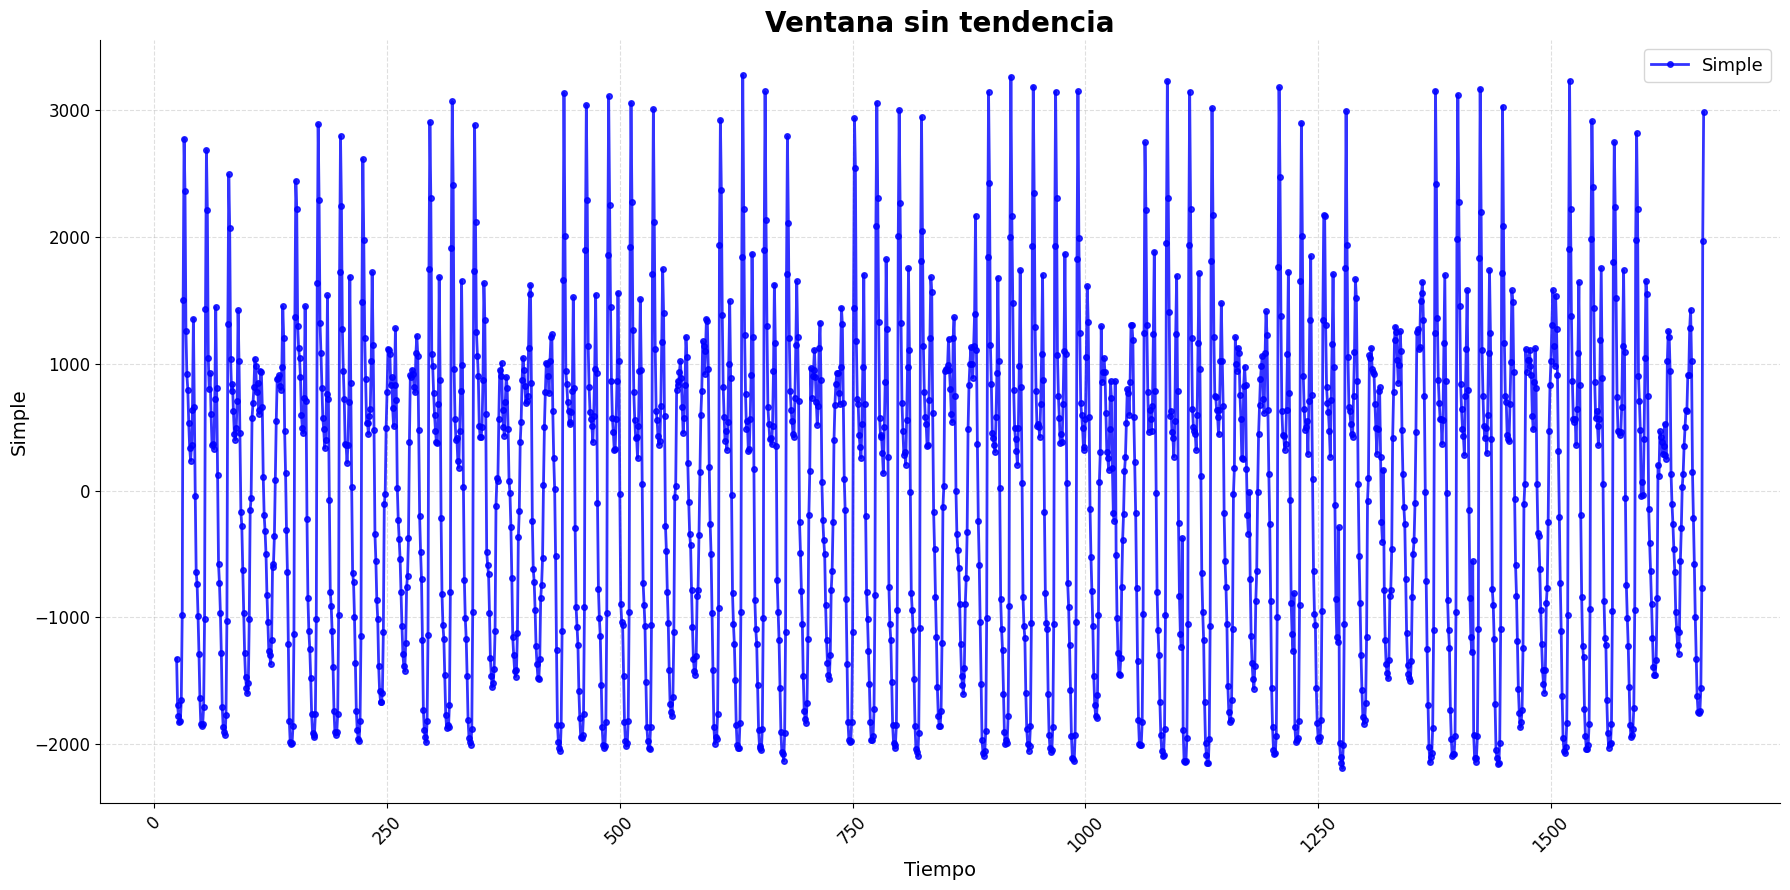

In [76]:
simple = ventana - tendencia_v
simple = pd.DataFrame(simple, columns = ['Simple'])
 
print(f'shape ventana   : {ventana.shape}')
print(f'shape tendencia : {tendencia_v.shape}')
print(f'shape simple    : {simple.shape}')
graficar_serie(simple, 'Simple', color = 'blue', titulo = 'Ventana sin tendencia')

### Experimento 

/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 Modelo ARIMA(2,2,10) entrenado exitosamente

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1641
Model:              SARIMAX(2, 2, 10)   Log Likelihood              -12428.827
Date:                Mon, 03 Nov 2025   AIC                          24883.653
Time:                        20:47:09   BIC                          24953.790
Sample:                             0   HQIC                         24909.674
                               - 1641                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2750      0.066     -4.196      0.000      -0.403      -0.147
ar.L2         -0.7698      0.065    -11.871      0.000      -0.897      -0.643
ma.L1

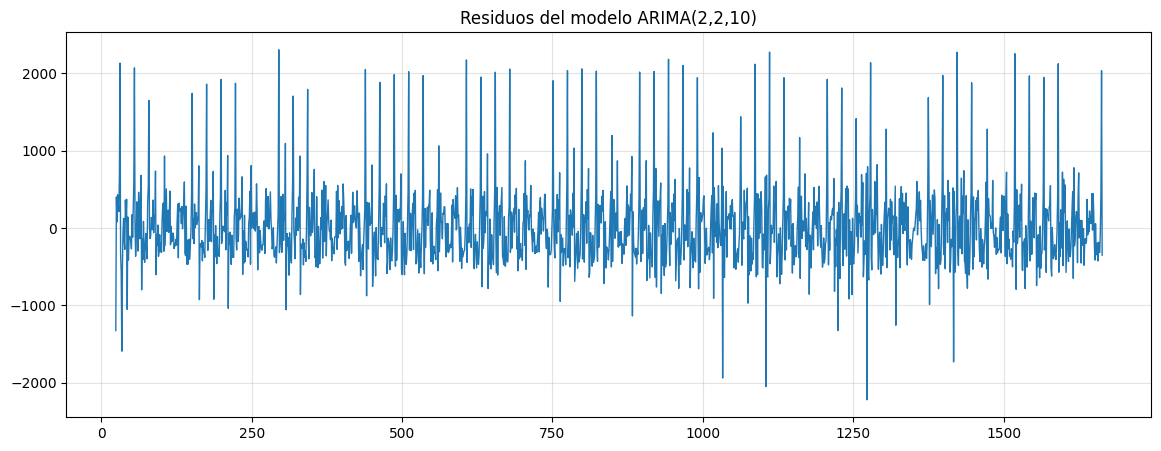

<Figure size 1400x400 with 0 Axes>

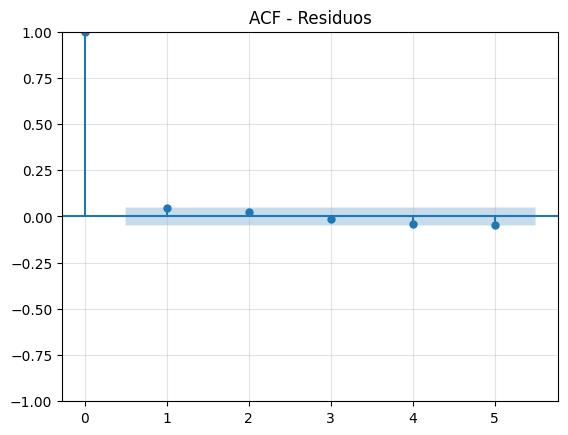

<Figure size 1400x400 with 0 Axes>

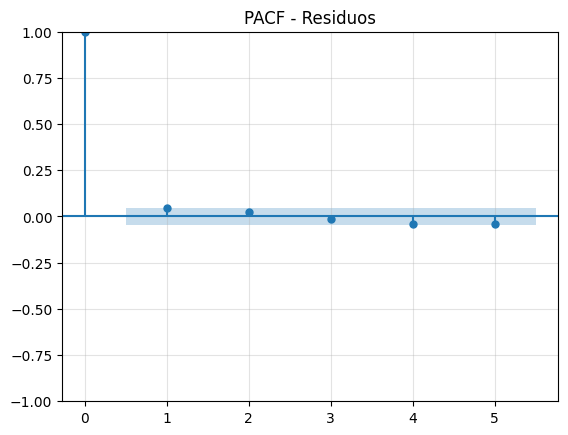


 Test de Ljung - Box ¿Es ruido blanco?

     lb_stat  lb_pvalue
1   3.208028   0.073278
2   4.214486   0.121573
3   4.416489   0.219861
4   7.404562   0.115992
5  10.656808   0.058625

 Interpretacion de la Hipótesis nula

Lag 1: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 2: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 3: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 4: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 5: No rechaza Ho -- Residuos se comportan como ruido blanco


In [77]:
serie = pd.Series(simple['Simple'].values, index=ventana.index)
p = 2
d = 2 
q = 10
resultado, residuos = ARIMA_experimento(serie, p, d, q, 5)

### Forecast

/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jair/anaconda3/envs/series_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


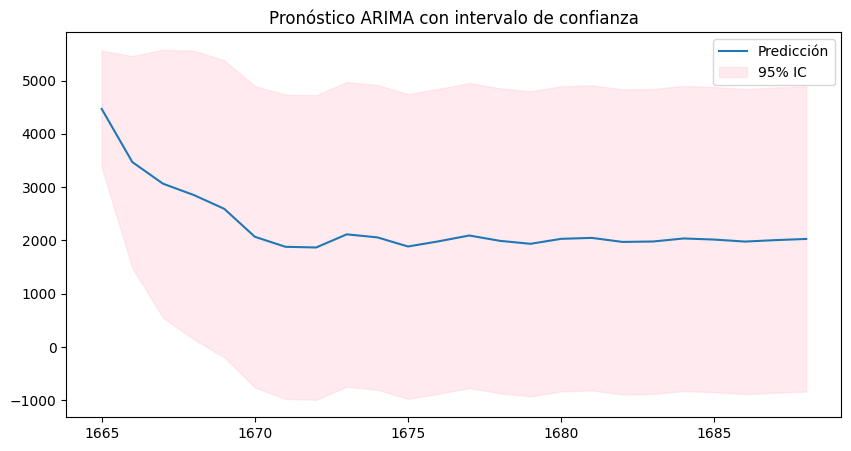

In [78]:
forecast_obj = resultado.get_forecast(steps=len(horizonte))

# Extraer la media predicha y alinear índices
forecast_std = forecast_obj.predicted_mean
forecast_std.index = horizonte.index

# Regresar el forecast a la escala de el horizonte
forecast_reescalado = forecast_std + tendencia_h

# Extraer intervalo de confianza directamente del objeto
intervalo = forecast_obj.conf_int(alpha=0.05)
intervalo.index = horizonte.index  # alinear índices con tu horizonte
intervalo = intervalo + tendencia_h.values.reshape(-1, 1)

# Graficar
plt.figure(figsize=(10,5))
plt.plot(forecast_reescalado, label='Predicción')
plt.fill_between(intervalo.index, intervalo.iloc[:, 0], intervalo.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% IC')
plt.legend()
plt.title('Pronóstico ARIMA con intervalo de confianza')
plt.show()

### Evaluar Forecast

In [79]:
y_true = np.array(horizonte.values).flatten()
y_pred = np.array(forecast_reescalado).flatten()

print(f'shape Y_True : {y_true.shape}')
print(f'shape Y_Pred : {y_pred.shape}')

medidas = evaluar_forecast(y_true, y_pred)

for nombre, valor in medidas.items():
    print(f'{nombre} : {np.round(valor, 4)}')

shape Y_True : (24,)
shape Y_Pred : (24,)
RMSE : 1343.4938
SMAPE : 67.8726
R2_Pearson : 0.1372


### Graficar

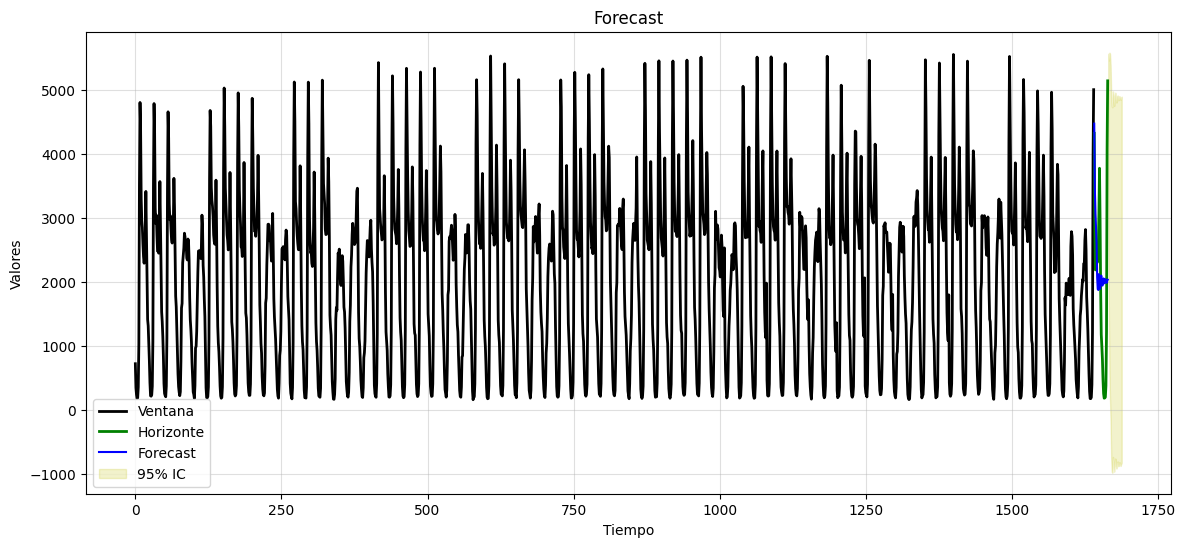

In [80]:
n_ventana = len(ventana)
n_horizonte = len(horizonte)
idx_ventana = np.arange(n_ventana)
idx_horizonte = np.arange(n_ventana, n_ventana + n_horizonte)

plt.figure(figsize=(14,6))
plt.plot(idx_ventana, ventana.values, label='Ventana', color='black', linewidth=2)
plt.plot(idx_horizonte, horizonte.values, label='Horizonte', color='green', linewidth=2)
plt.plot(idx_horizonte, forecast_reescalado, label='Forecast', color='b', linewidth=1.5)

plt.fill_between(intervalo.index, intervalo.iloc[:, 0], intervalo.iloc[:, 1],
                 color='y', alpha=0.2, label='95% IC')

plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Forecast')
plt.legend()
plt.grid(alpha=0.4)
plt.show()